# <center><font color=green> Introduction to CNN</font></center>


Deep Convolutional Neural Networks
================
------
(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr

-----

Welcome to the practical section of the 3rd lecture on deep learning. <br>
This exercise is divided into 5 parts. Each part is accompanied by a `TODO` exercise.<br>
You also have an additional `Bonus` exercise if you finish very quickly.<br>

**Instructions**:
* Read all the descriptions and code.
* Run the pre-completed cells.
* Fill in the `TODO`blocks and run the code.
* Ensure you are connected to the internet for the notebook image rendering.
* Please ask questions if you have any doubts.

--------

## Part 1:  Basic Neural Network Layers

<img src="https://drive.google.com/uc?id=1QT9Lfw_gk6CSQlaVVgaH6uv2hGGMbP0Q" width="500" style="margin-right: 100px" align="left"/>


**Objectives**:

* 1) To implement different layers of a neural network
* 2) To implement basic neural network operations
* 3) To inspect outputs of the neural network operations

**<br>Imports**

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import gzip
import urllib
from zipfile import ZipFile

import torchvision.transforms as TF
from torchvision.transforms import ToTensor, ToPILImage, Grayscale

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [44]:
# Run to install pydot
!pip install pydot-ng
!pip install graphviz
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<br>**Check your GPU and PyTorch version**

In [45]:
# check the pytorch version
print("PyTorch version: ", torch.__version__)

# check the GPU support; should be yes
print("Is GPU available ?: ", torch.cuda.is_available())

# check how many GPU(s) are present
print("How many GPU(s) ?", torch.cuda.device_count())

# get the information on the gpu:0
device0 = torch.device('cuda:0')
print("Infos :", torch.cuda.get_device_properties(device0))

PyTorch version:  1.12.1+cu113
Is GPU available ?:  True
How many GPU(s) ? 1
Infos : _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


<br>**Prepare image for neural network**
- We can directly read an image as usual
- To use the image with neural network layers, we have to convert from 3D to 4D tensors
- We also need to convert the data type to float
- However, to visualize the image, we convert back to integer and 3D tensor.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


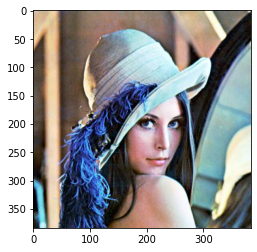

In [46]:
# First, prepare the image
from google.colab import drive
drive.mount('/content/drive')
img = plt.imread("/content/drive/MyDrive/datasets/sample_images/lenna.jpg")

# convert to a float tensor
img = ToTensor()(img)

# For Visualization:
# convert to 3D: by removing the batch dimension
img_init = ToPILImage()(img)

# display
plt.imshow(img_init)

**<br><br>PyTorch input image format for NN**
- Optimized for (mini)batch treatment of images
- CNN input tensor should be of the form [# samples, # Channels, Width Height]

In [47]:
img_input = torch.unsqueeze(img, dim=0)
print("Initial image tensor shape : {}".format(img.shape))
print("Image tensor fed into Conv2d shape : {}".format(img_input.shape))

Initial image tensor shape : torch.Size([3, 384, 384])
Image tensor fed into Conv2d shape : torch.Size([1, 3, 384, 384])


**<br><br>Convolution layer**
- Let's build a convolutional layer and perform convolution on the input image
- required args: size of filter, kernel_size, strides and padding information

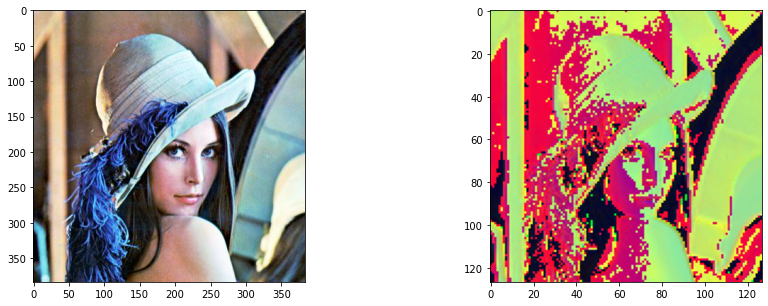

In [48]:
# Apply a random Conv2d layer to an input image
conv_img = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(5,5), stride=(3,3))(img_input)

# Prepare for display
conv_out = ToPILImage()(torch.squeeze(conv_img))

# Visulaize
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1); plt.imshow(img_init)
fig.add_subplot(1, 2, 2); plt.imshow(conv_out)

**<br><br>Pooling layer**
- Let's perform average pooling on the input image
- required args: pool_size, strides and padding information

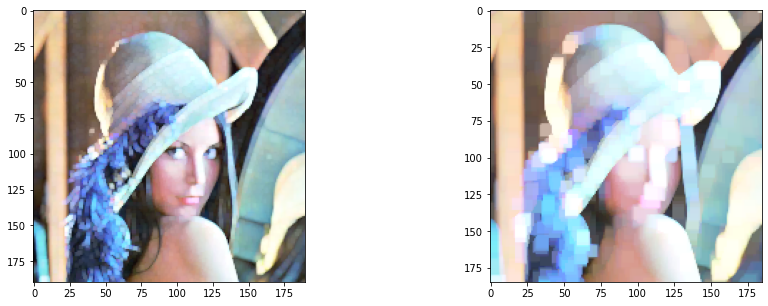

In [49]:
# Max Pooling using 5x5 kernel, strides of 2 with padding
maxpooled_img5x5 =  torch.nn.MaxPool2d(kernel_size=(5,5), stride=(2,2))(img_input)

# Max Pooling using 16x16 kernel, strides of 2 with padding
maxpooled_img16x16 =  torch.nn.MaxPool2d(kernel_size=(16,16), stride=(2,2))(img_input)

# Prepare for display
out_p5x5   = ToPILImage()(torch.squeeze(maxpooled_img5x5))
out_p16x16 = ToPILImage()(torch.squeeze(maxpooled_img16x16))

# Visualize
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 2, 1); plt.imshow(out_p5x5)
fig.add_subplot(1, 2, 2); plt.imshow(out_p16x16)

**<br><br>Dense layer**
- To use dense layer, you have to flatten the input first
- required args: pool_size, strides and padding information

In [50]:
# Remember to flatten your inputs before dense layer:
flat_img = torch.nn.Flatten()(img_input)
input_features = flat_img.shape[1]

# Adds a densely-connected layer with 100 units to the model and a relu activation function:
features = torch.nn.Linear(in_features=input_features, out_features=100, bias=True)(flat_img)


print("Before flattening: ", img_input.shape)
print("After flattening: ", flat_img.shape)
print("After dense: ", features.shape)

Before flattening:  torch.Size([1, 3, 384, 384])
After flattening:  torch.Size([1, 442368])
After dense:  torch.Size([1, 100])


#### <font color=red> <br><br><u><b>TODO 1:</b></u></font>
Solve the following problem:
- x1 = Read the image of icube laboratory and prepare it for neural network operation.
- x2 = Convolve (x1) with a 5x5 convolution layer to an output filter size of 64
- x3 = average pool (x2) using pool size (5x5)
- x4 = Convolve (x3) with a 3x3 convolution layer to an output filter size of 3
- Display the final output

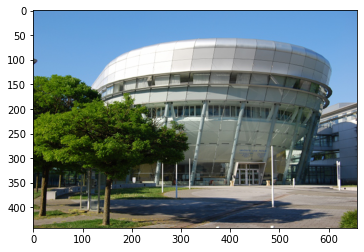

In [51]:
# First, prepare the image
img = plt.imread("/content/drive/MyDrive/datasets/sample_images/icube.jpg")

# convert to a tensor
img = ToTensor()(img)

# convert to 4D tensor: by adding a batch dimension at axis=0
img = torch.unsqueeze(img, axis=0)

# convert to 3D: by removing the batch dimension
out = torch.squeeze(img, axis=0)

# convert to PIL format
out = ToPILImage()(out)

# display
plt.imshow(out)


In [52]:
# Add Conv 3x3 kernel and 16 filters with strides of 1 and padded. Add a relu activation
features = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3,3), stride=(1,1), padding='same')(img)
features = torch.nn.ReLU()(features)

In [53]:
# Average Pooling using 64x64 kernel, strides of 2 with padding
features = torch.nn.AvgPool2d(kernel_size=(64,64), stride=2)(features)

In [54]:
# Add Conv 3x3 kernel and 3 filters with strides of 1 and padded. Add a relu activation
features = torch.nn.Conv2d(in_channels=16, out_channels=3, kernel_size=(3,3), stride=(1,1), padding='same')(features)
features = torch.nn.ReLU()(features)

torch.Size([3, 190, 298])


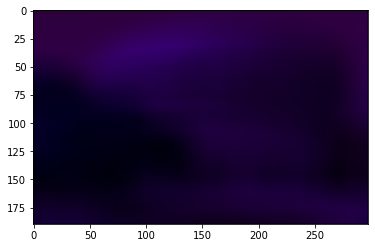

In [55]:
# Prepare for display
features = torch.squeeze(features)
print(features.shape)
out   = ToPILImage()(features)

# Visulaize
plt.imshow(out)


<br><br>

## Part 2: Image Filtering

- Do you know that convolution is used for image filtering?
- To get both low and high pass filters.
- With low level PyTorch layers, we can practise edge detection using sobel filter as shown below.
- We create the horizontal filter and transpose it to get the vertical filter.

![alt text](https://drive.google.com/uc?id=1byjcx3Y0eJEEEOq5m2xUrq-YZiuIe_Ko)



In [56]:
# Example 1: Create filters

# horizontal filter (w_h)
w_h = torch.tensor([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=torch.float32)
w_h = torch.unsqueeze(torch.unsqueeze(w_h, dim=0), dim=0)
print(w_h.shape)

# transpose for vertical filter (w_v)
w_v = w_h.permute([0,1,3,2])

# display
print('horizontal filter')
print(w_h[0,0,:,:].numpy())

print('vertical filter')
print(w_v[0,0,:,:].numpy())

torch.Size([1, 1, 3, 3])
horizontal filter
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
vertical filter
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


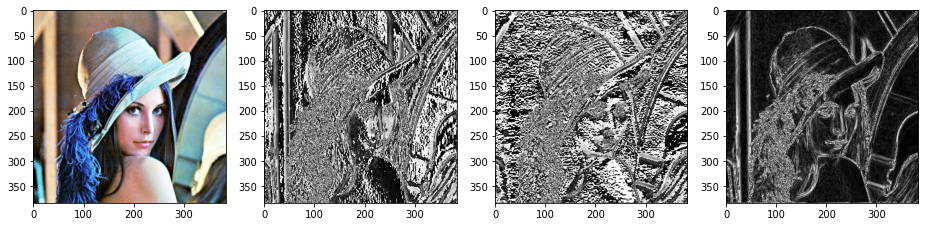

In [57]:
# Example 1: Convolution of the image for edge detection

# First, read image
img = plt.imread("/content/drive/MyDrive/datasets/sample_images/lenna.jpg")
img = ToTensor()(img)

# Convert the image to grayscale
img_gray = Grayscale()(img)

# Expand to have 4-D image tensor (from color image)
img_4d = torch.unsqueeze(img_gray, axis=0)

# create an horizontal Sobel filter from Conv2d, then apply to img
Sobel_h = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding="same", bias=False)
Sobel_h.weight = torch.nn.Parameter(w_h)
conv_h = Sobel_h(img_4d)

# create an vertical Sobel filter from Conv2d, then apply to img
Sobel_v = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding="same", bias=False)
Sobel_v.weight = torch.nn.Parameter(w_v)
conv_v = Sobel_v(img_4d)

# Combine conv_h and conv_w
conv_img = torch.sqrt(torch.pow(conv_h,2) + torch.pow(conv_v,2))


# Prepare for display
img_visual      = ToPILImage()(torch.squeeze(img))
conv_h_visual   = ToPILImage()(torch.squeeze(conv_h))
conv_v_visual   = ToPILImage()(torch.squeeze(conv_v))
conv_img_visual = ToPILImage()(torch.squeeze(conv_img))

# Visulaize the output of a convolution  
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 5, 1); plt.imshow(img_visual)
fig.add_subplot(1, 5, 2); plt.imshow(conv_h_visual, cmap='gray')
fig.add_subplot(1, 5, 3); plt.imshow(conv_v_visual, cmap='gray')
fig.add_subplot(1, 5, 4); plt.imshow(conv_img_visual, cmap='gray')
plt.show()

<br><br><hr>
## Part 3:  Building a Convolutional Neural Network (CNN) Model

**Objectives**:

* 1) To build a convolutional neural network (CNN) model.
* 2) To learn how to build sequential model.
* 3) To learn how to build functional model.
* 4) To automatically compute the model parameters.

<img src="https://www.researchgate.net/profile/Pascal-Scalart/publication/317267407/figure/fig13/AS:667887685627913@1536248241501/Figure-Reseau-convolutionnel-LeNet-5-Le-nombre-de-couches-celui-des-cartes-ainsi-que.ppm" width="800" style="margin-right: 100px" align="center"/>

--------------------
- Here is an implementation of a (slightly modified) LeNet5 model in PyTorch

In [58]:
# Model

import torch.nn as nn

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=(5, 5),
            stride=(1, 1),
            padding=(0, 0),
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=(5, 5),
            stride=(1, 1),
            padding=(0, 0),
        )
        self.conv3 = nn.Conv2d(
            in_channels=16,
            out_channels=120,
            kernel_size=(5, 5),
            stride=(1, 1),
            padding=(0, 0),
        )
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(
            self.conv3(x)
        )  # num_examples x 120 x 1 x 1 --> num_examples x 120
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

    
x_LeNet = torch.randn(64, 1, 32, 32)
model_LeNet = LeNet()
out_LeNet = model_LeNet(x_LeNet)
print(out_LeNet.shape)

torch.Size([64, 10])




- Display the model summary</font>

In [59]:
from torchsummary import summary
model_LeNet.to('cuda:0')   # torchsummary.summary can only display a model infos if model is casted to a cuda device
summary(model_LeNet, (1, 32, 32))     # provide "summary" with model and input data size

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              ReLU-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

<font color=red><br><br><u><b>TODO 2 : </b></u> </font>

<img src="https://drive.google.com/uc?id=1WpFCYmn_sHERY58l3nDz8A67EyMd_kD7" width="500" style="margin-right: 100px" align="center"/>

**Let's build a sequential model of the CNN in the diagram above**
- It has 3 convolutional layers, 3 max pooling layers and 2 dense layers
- The args for each layer is given in the diagram.
- Example Conv 7x7, 64, s2 means: convolution with 7x7 kernel_size, 64 filters and strides of 2. 
- Choose any number you like for the filters marked `A`, `B` and `C'.
- The last dense layer has 2 filters for binary classification.

In [60]:
# Define sequential model
class CNN(nn.Module):
    def __init__(self, nbchannels1=64, nbchannels2=128, nbchannels3=256):
        super(CNN, self).__init__()
        
        self.relu = nn.ReLU()
        
        self.conv1 = nn.Conv2d(in_channels=3, 
                               out_channels=nbchannels1, 
                               kernel_size=(7, 7), 
                               stride=(2, 2), 
                               padding=(0, 0),
                               )
        self.conv2 = nn.Conv2d(in_channels=nbchannels1,
                               out_channels=nbchannels2,
                               kernel_size=(3, 3),
                               stride=(1, 1),
                               padding=(0, 0),
                               )
        self.conv3 = nn.Conv2d(in_channels=nbchannels2,
                               out_channels=nbchannels3,
                               kernel_size=(3, 3),
                               stride=(1, 1),
                               padding=(0, 0),
                               )
        
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=3)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=1)
        
        self.linear1 = nn.Linear(9216, 84)
        self.linear2 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x
    
x_test = torch.randn(64, 3, 96, 96)
model = CNN()
out = model(x_test)
print(out.shape)

torch.Size([64, 2])


- Display the model summary</font>

In [61]:
from torchsummary import summary
model.to('cuda:0')  # torchsummary.summary can only display a model infos if model is casted to a cuda device
summary(model, (3, 96, 96))    # provide "summary" with model and input data size

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 45, 45]           9,472
              ReLU-2           [-1, 64, 45, 45]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
              ReLU-5          [-1, 128, 12, 12]               0
         MaxPool2d-6          [-1, 128, 10, 10]               0
            Conv2d-7            [-1, 256, 8, 8]         295,168
              ReLU-8            [-1, 256, 8, 8]               0
         MaxPool2d-9            [-1, 256, 6, 6]               0
           Linear-10                   [-1, 84]         774,228
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 2]             170
Total params: 1,152,894
Trainable params: 1,152,894
Non-trainable params: 0
---------------------------

<br><br><hr>
## Part 4:  Training and Visualization

<img src="https://drive.google.com/uc?id=17qNTciBU7N0aezeUVp3DBee72DNdJrVl" width="500" style="margin-right: 100px" align="left"/>


**Objectives**:

* 1) To prepare input pipeline for model training
* 2) To train a CNN model.
* 3) To practice with loss functions, backpropagation and gradient optimization.
* 4) Visualize the model training

<br>
<br> 

**Dataset input pipeline**
- So we will prepare our dataset to train the model we have built in the last exercise.
- The data preparation is the same as we have seen in the last practical.
 **_So let's have a recap_**

In [3]:
# The cat & dog dataset (https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1)
f = gzip.open('td_catsdogs2000_u8.pkl.gz', 'rb')
cat_dog_dataset = pickle.load(f,encoding='bytes')
f.close()

In [63]:
# generate random number to shuffle the dataset
perm = np.random.randint(2000, size=(2000))

# shuffle the dataset
cat_dog_dataset = (cat_dog_dataset[0][perm], cat_dog_dataset[1][perm])

In [64]:
# split into train, val and test sets as follows:

# train set = first 1200 samples
X_train, y_train = (cat_dog_dataset[0][0:1200], cat_dog_dataset[1][0:1200])

# val set = 400 samples betwen 1200 and 1600
X_val, y_val   = (cat_dog_dataset[0][1200:1600], cat_dog_dataset[1][1200:1600])

# test set = last 400 samples
X_test, y_test  = (cat_dog_dataset[0][1600:], cat_dog_dataset[1][1600:])

# print the shape
print("Train set shape: data={}, label={}".format(X_train.shape, y_train.shape))
print("Val set shape: data={}, label={}".format(X_val.shape, y_val.shape))
print("Test set shape: data={}, label={}".format(X_test.shape, y_test.shape))

Train set shape: data=(1200, 96, 96, 3), label=(1200, 1)
Val set shape: data=(400, 96, 96, 3), label=(400, 1)
Test set shape: data=(400, 96, 96, 3), label=(400, 1)


#### <font color=red> <br><br><u><b>TODO</b></u> 3:</font>
- Create a class CatsDogs that inherits torch.utils.data.Dataset
- Create train_set, val_set & test_set based on previously defined X_train, y_train ... 
- Create corresponding dataloaders and test it

In [65]:
# Create a CatsDogs dataset class
from torch.utils.data import Dataset

class CatsDogs(Dataset):
    def __init__(self, data, labels, transform=ToTensor()):
        self.data = data
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return (self.transform(self.data[idx,...]), torch.tensor(self.labels[idx], dtype=torch.long))

Text(0.5, 1.0, 'tensor([1])')

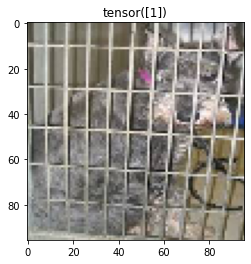

In [66]:
# Create train, val & test sets from CatsDogs dataset class
train_set = CatsDogs(X_train, y_train)
val_set = CatsDogs(X_val, y_val)
test_set = CatsDogs(X_test, y_test)

# retrieve sample #185 and display corresponding image with label as title
idx = 185
plt.imshow(ToPILImage()(train_set[idx][0]))
plt.title(train_set[idx][1])

In [67]:
# Create train & val & test sets dataloaders
from torch.utils.data import DataLoader
bs = 64

train_loader = DataLoader(dataset=train_set, 
                          shuffle=True, 
                          batch_size=bs,
                         )
val_loader = DataLoader(dataset=val_set, 
                          shuffle=False, 
                          batch_size=bs,
                         )
test_loader = DataLoader(dataset=test_set, 
                          shuffle=False, 
                          batch_size=bs,
                         )

In [68]:
#create an iterable from train_loader for tests 
dataiter = iter(train_loader)

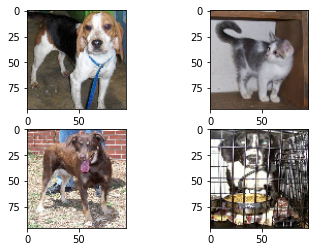

In [69]:
#display the first two minibatches (consisting of 2 images each)
image, label = dataiter.next()
plt.subplot(2,2,1)
plt.imshow(ToPILImage()(image[0,...]))
plt.subplot(2,2,2)
plt.imshow(ToPILImage()(image[1,...]))

image, label = dataiter.next()
plt.subplot(2,2,3)
plt.imshow(ToPILImage()(image[0,...]))
plt.subplot(2,2,4)
plt.imshow(ToPILImage()(image[1,...]))

<br>
<br> 

**Training**
- Here we will setup the training loop

In [70]:
# create a cnn model instance from CNN and cast it to "device" (which is either "cpu" or "cuda:0")
cnn = CNN()
cnn.to(device)

CNN(
  (relu): ReLU()
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=5, stride=3, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=9216, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=2, bias=True)
)

In [71]:
#utility function to compute the model accuracy on a dataloader
def accuracy(dataloader, model):
    #set model in evaluate mode (to avoid random based layers (dropout, ...) to be activated during inference)
    model.eval()
    #computation of model accuracy on data
    nsample = 0 
    nmatch = 0 
    for data in dataloader : 
        inputs, labels = data[0].to(device), data[1].to(device)
        labels = torch.squeeze(labels.reshape(1,-1))
        nsample += labels.shape[0]
        # set torch in no_grad mode to avoid interfering with backward process
        with torch.no_grad(): 
            outputs = model(inputs)
            outputs = torch.max(outputs, dim=1).indices
        match = torch.sum(outputs == labels)
        nmatch += match.item()
    #reset model in training mode (reactivate random based layers)
    model.train()
    return float(nmatch) / float(nsample)

In [72]:
# accuracy check on test dataset (random cnn)
acc_test_history = accuracy(test_loader, cnn)
print("Accuracy on test dataset is {}%".format(acc_test_history * 100))

Accuracy on test dataset is 47.5%


In [73]:
#define the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=1e-4)

In [74]:
# training loop
loss_train_history = np.ndarray(0,)
loss_val_history = np.ndarray(0,)
acc_train_history = np.ndarray(0,)
acc_val_history = np.ndarray(0,)

for epoch in range(75):  # loop over the dataset multiple times

    running_loss = 0.0
    n=0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        labels = torch.squeeze(labels.reshape(1,-1))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            # compute & print loss on training data
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10.))
            loss_train_history = np.append(loss_train_history, running_loss / 10.) # "classical" log
            running_loss = 0.0
            
            # compute & print loss on validation data
            n=0
            running_val_loss = 0.0
            for i, data in enumerate(val_loader, 0):
                n += 1
                inputs, labels = data[0].to(device), data[1].to(device)
                labels = torch.squeeze(labels.reshape(1,-1))
                with torch.no_grad(): 
                    outputs = cnn(inputs)
                    val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()
            loss_val_history = np.append(loss_val_history, running_val_loss / n)     # "classical" log
            print('val_loss : %.3f' % (running_val_loss / n))
    
    #after each epoch computes the accuracy on training and validation data
    epoch_train_acc = accuracy(train_loader, cnn)
    acc_train_history = np.append(acc_train_history, epoch_train_acc)
    epoch_val_acc = accuracy(val_loader, cnn)
    acc_val_history = np.append(acc_val_history, epoch_val_acc)
 
print('Finished Training')

[1,    10] loss: 0.692
val_loss : 0.689
[2,    10] loss: 0.686
val_loss : 0.682
[3,    10] loss: 0.663
val_loss : 0.668
[4,    10] loss: 0.640
val_loss : 0.637
[5,    10] loss: 0.643
val_loss : 0.633
[6,    10] loss: 0.633
val_loss : 0.641
[7,    10] loss: 0.608
val_loss : 0.630
[8,    10] loss: 0.616
val_loss : 0.643
[9,    10] loss: 0.577
val_loss : 0.617
[10,    10] loss: 0.596
val_loss : 0.614
[11,    10] loss: 0.573
val_loss : 0.607
[12,    10] loss: 0.546
val_loss : 0.602
[13,    10] loss: 0.544
val_loss : 0.614
[14,    10] loss: 0.556
val_loss : 0.601
[15,    10] loss: 0.535
val_loss : 0.596
[16,    10] loss: 0.499
val_loss : 0.573
[17,    10] loss: 0.509
val_loss : 0.574
[18,    10] loss: 0.487
val_loss : 0.537
[19,    10] loss: 0.488
val_loss : 0.559
[20,    10] loss: 0.420
val_loss : 0.510
[21,    10] loss: 0.413
val_loss : 0.491
[22,    10] loss: 0.447
val_loss : 0.542
[23,    10] loss: 0.396
val_loss : 0.518
[24,    10] loss: 0.348
val_loss : 0.445
[25,    10] loss: 0.327
v

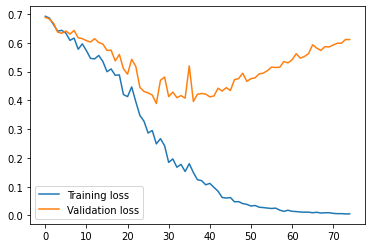

In [75]:
plt.plot(loss_train_history)
plt.plot(loss_val_history)
plt.legend(['Training loss', 'Validation loss'])

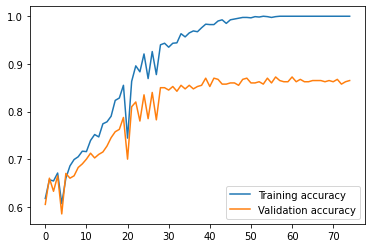

In [76]:
# plot the accuracy history on training & validation data
plt.plot(acc_train_history)
plt.plot(acc_val_history)
plt.legend(['Training accuracy', 'Validation accuracy'])

<br><br><hr>
## Part 5:  Inference

**Objectives**:

* 1) To test the model on unseen data
* 2) To evaluate the model performance

<br>

**We test our trained model on the test set**

In [77]:
acc_test_history = accuracy(test_loader, cnn)
print("Accuracy on test dataset is {}%".format(acc_test_history * 100))

Accuracy on test dataset is 83.75%


<hr /><hr />

### <font color=green> Congratulations!! this is end of second part </font> 